# Solar Power

## Business Understanding

### Stakeholder:
- 
-
-

### True Business Problem:
With a recent push for cleaner renewable energy (company name) is seeing an increase in solar panel request. (company name) is looking the potential of solar power and how it can meet the demands of the current power consumption. 

# Data Understanding

In [1]:
# imports
import pandas as pd
import numpy as np

from datetime import datetime as dt
import requests 
from secret import keys

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
api_key = keys.API_KEY
# pulling in the API key from the website

### Params 
- Below I will set the parameters and pull in data from three different time frames until I get a reasonable amount of data

In [3]:
base_url = 'https://api.eia.gov/v2/electricity/rto/fuel-type-data/data'

In [45]:
params = {
    'api_key': api_key,
    "frequency": "hourly", # pulling data in hourly.
    "data[]": "value", # amount of energy produced or consumed?
    "facets[fueltype][]":["SUN", "WND", "NG", "OIL"], # energy source (solar)
    "facets[respondent][]": "SOCO", # recording location of data (Southern Company)
    "start": "2022-07-01", # Time frame to pull data (start and end date)
    "end": "2022-07-29"
}

# the exact same parameters will be used for future data acquisitions. 
            ## The time frame will be the only change within the code. 

In [5]:
resp = requests.get(base_url, params = params)

In [6]:
resp.status_code
# receiving a 200 means a successful response from the `base_url`

200

In [7]:
data = resp.json()


In [8]:
data['response'].keys()

dict_keys(['query execution', 'count query execution', 'total', 'dateFormat', 'frequency', 'data', 'description'])

In [9]:
df_1 = pd.DataFrame(data['response']['data'])
df_1

,period,respondent,respondent-name,fueltype,type-name,value,value-units
0,2022-07-01T00,SOCO,"Southern Company Services, Inc. - Trans",WND,Wind,0,megawatthours
1,2022-07-01T01,SOCO,"Southern Company Services, Inc. - Trans",WND,Wind,0,megawatthours
2,2022-07-01T02,SOCO,"Southern Company Services, Inc. - Trans",WND,Wind,0,megawatthours
3,2022-07-01T03,SOCO,"Southern Company Services, Inc. - Trans",WND,Wind,0,megawatthours
4,2022-07-01T04,SOCO,"Southern Company Services, Inc. - Trans",WND,Wind,0,megawatthours
...,...,...,...,...,...,...,...
2683,2022-07-28T19,SOCO,"Southern Company Services, Inc. - Trans",SUN,Solar,1099,megawatthours
2684,2022-07-28T20,SOCO,"Southern Company Services, Inc. - Trans",SUN,Solar,1006,megawatthours
2685,2022-07-28T21,SOCO,"Southern Company Services, Inc. - Trans",SUN,Solar,798,megawatthours
2686,2022-07-28T22,SOCO,"Southern Company Services, Inc. - Trans",SUN,Solar,765,megawatthours


In [10]:
params_2 = {
    'api_key': api_key,
    "frequency": "hourly",
    "data[]": "value",
    "facets[fueltype][]": ["SUN", "WND", "NG", "OIL"],
    "facets[respondent][]": "SOCO",
    "start": "2021-07-01",
    "end": "2021-12-31"
}

In [11]:
resp_2 = requests.get(base_url, params = params_2)

In [12]:
resp_2.status_code

200

In [13]:
data_2 = resp_2.json()

In [14]:
df_2 = pd.DataFrame(data_2['response']['data'])
df_2

,period,respondent,respondent-name,fueltype,type-name,value,value-units
0,2021-07-01T00,SOCO,"Southern Company Services, Inc. - Trans",WND,Wind,0,megawatthours
1,2021-07-01T01,SOCO,"Southern Company Services, Inc. - Trans",WND,Wind,0,megawatthours
2,2021-07-01T02,SOCO,"Southern Company Services, Inc. - Trans",WND,Wind,0,megawatthours
3,2021-07-01T03,SOCO,"Southern Company Services, Inc. - Trans",WND,Wind,0,megawatthours
4,2021-07-01T04,SOCO,"Southern Company Services, Inc. - Trans",WND,Wind,0,megawatthours
...,...,...,...,...,...,...,...
4995,2021-07-26T03,SOCO,"Southern Company Services, Inc. - Trans",NG,Natural gas,17422,megawatthours
4996,2021-07-26T04,SOCO,"Southern Company Services, Inc. - Trans",NG,Natural gas,15280,megawatthours
4997,2021-07-26T05,SOCO,"Southern Company Services, Inc. - Trans",NG,Natural gas,13216,megawatthours
4998,2021-07-26T06,SOCO,"Southern Company Services, Inc. - Trans",NG,Natural gas,12665,megawatthours


In [15]:
params_3 = {
    'api_key': api_key,
    "frequency": "hourly",
    "data[]": "value",
    "facets[fueltype][]": ["SUN", "WND", "NG", "OIL"],
    "facets[respondent][]": "SOCO",
    "start": "2022-01-01",
    "end": "2022-06-30"
}

In [16]:
resp_3 = requests.get(base_url, params = params_3)

In [17]:
resp_3.status_code

200

In [18]:
data_3 = resp_3.json()

In [19]:
df_3 = pd.DataFrame(data_3['response']['data'])
df_3

,period,respondent,respondent-name,fueltype,type-name,value,value-units
0,2022-01-01T00,SOCO,"Southern Company Services, Inc. - Trans",WND,Wind,0,megawatthours
1,2022-01-01T01,SOCO,"Southern Company Services, Inc. - Trans",WND,Wind,0,megawatthours
2,2022-01-01T02,SOCO,"Southern Company Services, Inc. - Trans",WND,Wind,0,megawatthours
3,2022-01-01T03,SOCO,"Southern Company Services, Inc. - Trans",WND,Wind,0,megawatthours
4,2022-01-01T04,SOCO,"Southern Company Services, Inc. - Trans",WND,Wind,0,megawatthours
...,...,...,...,...,...,...,...
4995,2022-01-29T03,SOCO,"Southern Company Services, Inc. - Trans",NG,Natural gas,17075,megawatthours
4996,2022-01-29T04,SOCO,"Southern Company Services, Inc. - Trans",NG,Natural gas,17120,megawatthours
4997,2022-01-29T05,SOCO,"Southern Company Services, Inc. - Trans",NG,Natural gas,16740,megawatthours
4998,2022-01-29T06,SOCO,"Southern Company Services, Inc. - Trans",NG,Natural gas,16093,megawatthours


### Creating the dataframe
- I will take the three groups of data from of above and pull them into one dataframe using the `concatenate` method.

In [20]:
frames = [df_1, df_2, df_3]

In [21]:
result = pd.concat(frames)

In [22]:
df = pd.concat(frames)
df

,period,respondent,respondent-name,fueltype,type-name,value,value-units
0,2022-07-01T00,SOCO,"Southern Company Services, Inc. - Trans",WND,Wind,0,megawatthours
1,2022-07-01T01,SOCO,"Southern Company Services, Inc. - Trans",WND,Wind,0,megawatthours
2,2022-07-01T02,SOCO,"Southern Company Services, Inc. - Trans",WND,Wind,0,megawatthours
3,2022-07-01T03,SOCO,"Southern Company Services, Inc. - Trans",WND,Wind,0,megawatthours
4,2022-07-01T04,SOCO,"Southern Company Services, Inc. - Trans",WND,Wind,0,megawatthours
...,...,...,...,...,...,...,...
4995,2022-01-29T03,SOCO,"Southern Company Services, Inc. - Trans",NG,Natural gas,17075,megawatthours
4996,2022-01-29T04,SOCO,"Southern Company Services, Inc. - Trans",NG,Natural gas,17120,megawatthours
4997,2022-01-29T05,SOCO,"Southern Company Services, Inc. - Trans",NG,Natural gas,16740,megawatthours
4998,2022-01-29T06,SOCO,"Southern Company Services, Inc. - Trans",NG,Natural gas,16093,megawatthours


In [33]:
df.loc[df['period'] == '2021-07-01T00']

,period,respondent,respondent-name,fueltype,type-name,value,value-units
0,2021-07-01T00,SOCO,"Southern Company Services, Inc. - Trans",WND,Wind,0,megawatthours
4392,2021-07-01T00,SOCO,"Southern Company Services, Inc. - Trans",NG,Natural gas,20540,megawatthours


In [25]:
df.isna().sum()

period             0
respondent         0
respondent-name    0
fueltype           0
type-name          0
value              0
value-units        0
dtype: int64

In [40]:
pd.pivot(data = df, index = 'period', columns = 'fueltype', values = 'value').isna().sum()

fueltype
NG     7424
OIL    8712
SUN    8712
WND       0
dtype: int64

In [43]:
df_3.loc[df_3['period'].str.contains('2022-06-01')]

,period,respondent,respondent-name,fueltype,type-name,value,value-units
3624,2022-06-01T00,SOCO,"Southern Company Services, Inc. - Trans",WND,Wind,0,megawatthours
3625,2022-06-01T01,SOCO,"Southern Company Services, Inc. - Trans",WND,Wind,0,megawatthours
3626,2022-06-01T02,SOCO,"Southern Company Services, Inc. - Trans",WND,Wind,0,megawatthours
3627,2022-06-01T03,SOCO,"Southern Company Services, Inc. - Trans",WND,Wind,0,megawatthours
3628,2022-06-01T04,SOCO,"Southern Company Services, Inc. - Trans",WND,Wind,0,megawatthours
3629,2022-06-01T05,SOCO,"Southern Company Services, Inc. - Trans",WND,Wind,0,megawatthours
3630,2022-06-01T06,SOCO,"Southern Company Services, Inc. - Trans",WND,Wind,0,megawatthours
3631,2022-06-01T07,SOCO,"Southern Company Services, Inc. - Trans",WND,Wind,0,megawatthours
3632,2022-06-01T08,SOCO,"Southern Company Services, Inc. - Trans",WND,Wind,0,megawatthours
3633,2022-06-01T09,SOCO,"Southern Company Services, Inc. - Trans",WND,Wind,0,megawatthours


## Data Exploring and Cleaning

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12688 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   period           12688 non-null  object
 1   respondent       12688 non-null  object
 2   respondent-name  12688 non-null  object
 3   fueltype         12688 non-null  object
 4   type-name        12688 non-null  object
 5   value            12688 non-null  int64 
 6   value-units      12688 non-null  object
dtypes: int64(1), object(6)
memory usage: 793.0+ KB


In [25]:
df['fueltype'].value_counts

<bound method IndexOpsMixin.value_counts of 0       WND
1       WND
2       WND
3       WND
4       WND
       ... 
4995     NG
4996     NG
4997     NG
4998     NG
4999     NG
Name: fueltype, Length: 12688, dtype: object>

In [26]:
df['period'].max()

'2022-07-28T23'

In [27]:
df['period'].min()

'2021-07-01T00'

In [28]:
df['fueltype'].unique()

array(['WND', 'NG', 'OIL', 'SUN'], dtype=object)

In [29]:
df['type-name'].unique()

array(['Wind', 'Natural gas', 'Petroleum', 'Solar'], dtype=object)

In [30]:
df.isna().sum()

period             0
respondent         0
respondent-name    0
fueltype           0
type-name          0
value              0
value-units        0
dtype: int64

In [31]:
df['period'] = pd.to_datetime(df['period'])
# used the pandas to_datetime funtion switch the Dtype of the period column

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12688 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   period           12688 non-null  datetime64[ns]
 1   respondent       12688 non-null  object        
 2   respondent-name  12688 non-null  object        
 3   fueltype         12688 non-null  object        
 4   type-name        12688 non-null  object        
 5   value            12688 non-null  int64         
 6   value-units      12688 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 793.0+ KB


In [33]:
df = df.set_index('period')
df.head()

,respondent,respondent-name,fueltype,type-name,value,value-units
period,,,,,,
2022-07-01 00:00:00,SOCO,"Southern Company Services, Inc. - Trans",WND,Wind,0,megawatthours
2022-07-01 01:00:00,SOCO,"Southern Company Services, Inc. - Trans",WND,Wind,0,megawatthours
2022-07-01 02:00:00,SOCO,"Southern Company Services, Inc. - Trans",WND,Wind,0,megawatthours
2022-07-01 03:00:00,SOCO,"Southern Company Services, Inc. - Trans",WND,Wind,0,megawatthours
2022-07-01 04:00:00,SOCO,"Southern Company Services, Inc. - Trans",WND,Wind,0,megawatthours


Now I want to explore and see if the Datetime index worked.

In [34]:
df['respondent-name'].value_counts()

Southern Company Services, Inc. - Trans    12688
Name: respondent-name, dtype: int64

In [35]:
df.index[0]

Timestamp('2022-07-01 00:00:00')

In [36]:
df.index[0].month

7

In [37]:
df.index[0].year

2022

In [38]:
df.index[0].day

1

In [39]:
df = df.sort_index()
# sorting the data by date using sort_index

In [40]:
df_resampled = df.resample('D').sum()

In [41]:
df_resampled

,value
period,
2021-07-01,393574
2021-07-02,370842
2021-07-03,331165
2021-07-04,312014
2021-07-05,350574
...,...
2022-07-24,460483
2022-07-25,443328
2022-07-26,501879


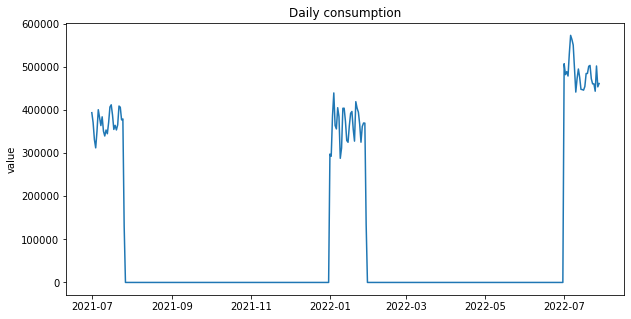

In [42]:
# Plot our new df_resampled
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_resampled)
ax.set_title('Daily consumption')
ax.set_ylabel('value');

In [52]:
group = df.groupby('fueltype')
group.first()

,respondent,respondent-name,type-name,value,value-units
fueltype,,,,,
NG,SOCO,"Southern Company Services, Inc. - Trans",Natural gas,20540,megawatthours
OIL,SOCO,"Southern Company Services, Inc. - Trans",Petroleum,0,megawatthours
SUN,SOCO,"Southern Company Services, Inc. - Trans",Solar,249,megawatthours
WND,SOCO,"Southern Company Services, Inc. - Trans",Wind,0,megawatthours


In [55]:
ng_gr = group.get_group('NG')

In [57]:
type(ng_gr)

pandas.core.frame.DataFrame

In [59]:
ng_diff = ng_gr['value'].diff().dropna()

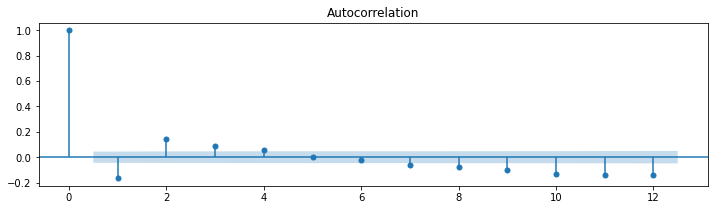

In [71]:
# Plot the ACF
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(12,3))
plot_acf(ng_diff,ax=ax, lags=12);

In [62]:
oil_gr = group.get_group('OIL')

In [63]:
oil_diff = oil_gr['value'].diff().dropna()

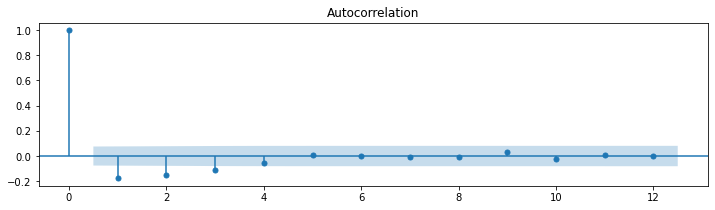

In [70]:
# Plot the ACF
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(12,3))
plot_acf(oil_diff,ax=ax, lags=12);

In [65]:
sun_gr = group.get_group('SUN')

In [66]:
sun_diff = sun_gr['value'].diff().dropna()

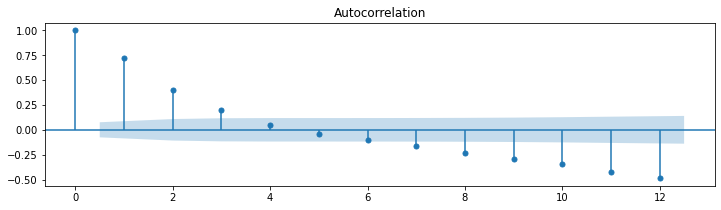

In [69]:
# Plot the ACF
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(12,3))
plot_acf(sun_diff,ax=ax, lags=12);

In [72]:
wnd_gr = group.get_group('WND')

In [73]:
wnd_diff = wnd_gr['value'].diff().dropna()

C:\Users\FFF\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\stattools.py:672: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
C:\Users\FFF\anaconda3\envs\learn-env\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


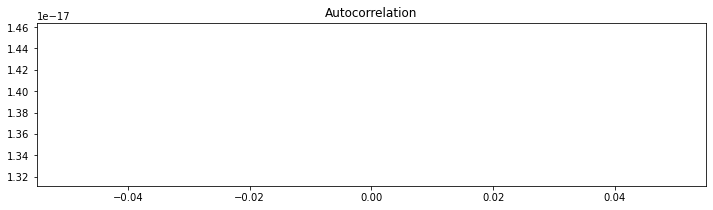

In [74]:
# Plot the ACF
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(12,3))
plot_acf(wnd_diff,ax=ax, lags=12);

In [83]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [82]:
sun_loc = df.loc[df['fueltype'] == 'SUN']['value']

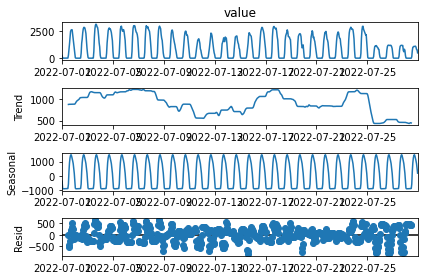

In [86]:
sun_decomp = seasonal_decompose(sun_loc)
sun_decomp.plot();